In [ ]:
import os
sep_local = os.path.sep
sep_local

In [ ]:
%env TF_KERAS = 1

In [ ]:
import sys
sys.path.append('..' + sep_local + '..' + sep_local + '..') # For Windows import

In [ ]:
import os
os.chdir('..' + sep_local + '..' + sep_local + '..') # For Linux import


In [ ]:
from training.generators.file_image_generator import create_image_lists, get_generators

In [ ]:
#IMG_DIR = 'D:\\datasets\\Ms_Pacman\\Ms_Pacman\\Test\\'
IMG_DIR = '/home/azeghost/datasets/.mspacman/atari_v1/screens/mspacman' #Linux

In [ ]:
#IMG_DIR = '..\..\..\\data\\atari_v1\\screens\\mspacman'
VAL_PCT = 25
VAL_FORMAT = 'png'

In [ ]:
imgs_list = create_image_lists(
    image_dir=IMG_DIR, 
    validation_pct=VAL_PCT, 
    valid_imgae_formats=VAL_FORMAT
)

## downscalse the image into fifth

In [10]:
scale=5
IMG_SIZE=(160//scale, 210//scale, 3)
BATCH_SIZE = 5
EPIS_LEN = 10
EPIS_SHIFT = 5

In [11]:
#we created new  class_mode  episode_flat witch returns 
#da.from_array(np.reshape(batch_x, (-1,)+self.image_shape )), da.from_array(np.reshape(batch_gt, (-1,)+self.image_shape))

In [12]:
train_gen, test_gen = get_generators(
    images_list=imgs_list, 
    image_dir=IMG_DIR, 
    image_size=IMG_SIZE, 
    batch_size=BATCH_SIZE, 
    class_mode='episode_flat', 
    episode_len=EPIS_LEN, 
    episode_shift=EPIS_SHIFT
)

In [13]:
import tensorflow as tf

In [14]:
#changed output shapes of Dataset Generators 
#from (BATCH_SIZE, EPIS_LEN, ) + IMG_SIZE)
#to (BATCH_SIZE* EPIS_LEN, ) + IMG_SIZE) 

(32, 42, 3)

In [15]:
train_ds = tf.data.Dataset.from_generator(
    lambda: train_gen, 
    output_types=(tf.float32, tf.float32) ,
    output_shapes=(tf.TensorShape((BATCH_SIZE* EPIS_LEN, ) + IMG_SIZE), 
                   tf.TensorShape((BATCH_SIZE* EPIS_LEN, ) + IMG_SIZE)
                  )
)

test_ds = tf.data.Dataset.from_generator(
    lambda: test_gen,     
    output_types=(tf.float32, tf.float32) ,
    output_shapes=(tf.TensorShape((BATCH_SIZE* EPIS_LEN, ) + IMG_SIZE), 
                   tf.TensorShape((BATCH_SIZE* EPIS_LEN, ) + IMG_SIZE)
                  )
)


In [16]:
dataset_name = 'atari_v1_Pacman'

In [17]:
intermediate_dim = 10
inputs_shape= IMG_SIZE # image shape
latent_dim = 10

In [19]:
inputs_shape

In [20]:
enc_lays2 = [
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    # No activation
    tf.keras.layers.Dense(latent_dim)
]

enc_lays3 = [
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
    tf.keras.layers.Flatten(),
    # No activation
    tf.keras.layers.Dense(latent_dim)
]

dec_lays2 = [
    tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
    tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
    tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=3, strides=(2, 2), padding="SAME", activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=3, strides=(2, 2), padding="SAME", activation='relu'),
    
    # No activation
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=3, strides=(1, 1), padding="SAME")
]

In [21]:
model_name = 'Atari_VAE_Basic_Conv2D'

In [22]:
import os
#recording_dir='..'+sep_local+'..'+sep_local+'..'+sep_local+'recording'+sep_local + model_name
recording_dir=os.getcwd()+ sep_local  +'recording'+sep_local + model_name

'..\\recording\\Atari_VAE_B_Conv2D\\var_save_dir'

In [23]:
from os.path import abspath
absolute = abspath(recording_dir)
print("Recording_dir",absolute)
print("Current working dir",os.getcwd())

(32, 42, 3)

In [24]:
from training.autoencoding_basic.autoencoders.autoencoder import autoencoder as AE

inference_mean
Model: "inference_mean"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 20, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 9, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 4032)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                40330     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization (BatchNo (None, 1

  WARNING  | None


inference_logvariance
Model: "inference_logvariance"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 15, 20, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 9, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                40330     
_________________________________________________________________
flatten_3 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_1 (

  WARNING  | None


generative
Model: "generative"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1568)              17248     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 4032)    

  WARNING  | None


In [25]:
variables_params = \
[
    {
        'name': 'inference_mean', 
        'inputs_shape':inputs_shape,
        'outputs_shape':latent_dim,
        'layers': enc_lays2
    }
    ,
    
     {
        'name': 'inference_logvariance', 
        'inputs_shape':inputs_shape,
        'outputs_shape':latent_dim,
        'layers':enc_lays3
    }
    ,
    
        {
        'name': 'generative', 
        'inputs_shape':latent_dim,
        'outputs_shape':inputs_shape,
        'layers':dec_lays2
    }
]

In [26]:
from utils.data_and_files.file_utils import create_if_not_exist
_restore = os.path.join(recording_dir, 'var_save_dir')
create_if_not_exist(_restore)
absolute = abspath(_restore)
print("Restore_dir",absolute)

TensorShape([36, 10])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



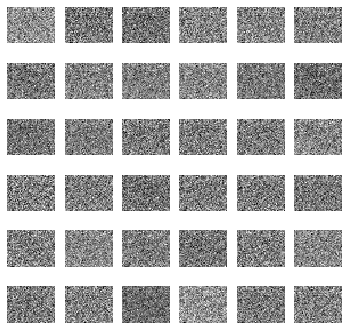

  ERROR    | No former training found ... 
Epochs Progress:   0%|                                                                          | 0/10 [00:00<?, ?it/s]

  INFO     | Training ... 
Epochs Progress, Training Iterations 10:   0%|                                                  | 0/10 [00:14<?, ?it/s]

KeyboardInterrupt: 

In [27]:
ae = AE( 
    name=model_name,
    inputs_shape=inputs_shape,
    outputs_shape=inputs_shape,
    latent_dim=latent_dim,
    batch_size=BATCH_SIZE,
    variables_params=variables_params, 
    filepath=None #to restore trained model, set filepath=_restore
    )

In [ ]:
ae.compile(metrics=None)

In [ ]:
train_ds

In [ ]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)
from training.callbacks.progress_bar import NotebookPrograssBar
from training.callbacks.sample_generation import SampleGeneration
from training.callbacks.save_model import ModelSaver


In [ ]:
progbar = NotebookPrograssBar(leave_outer=False)

In [ ]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    min_delta=1e-12, 
    patience=5, 
    verbose=1, 
    restore_best_weights=True
)

In [ ]:
ms = ModelSaver(filepath=_restore,save_freq=5)

In [ ]:
csv_dir = os.path.join(recording_dir, 'csv_dir')
create_if_not_exist(csv_dir)
csv_dir = os.path.join(csv_dir, model_name+'.csv')
csv_log = tf.keras.callbacks.CSVLogger(csv_dir, append=True)
absolute = abspath(csv_dir)
print("Csv_dir",absolute)

In [ ]:
image_gen_dir = os.path.join(recording_dir, 'image_gen_dir')
create_if_not_exist(image_gen_dir)
absolute = abspath(image_gen_dir)
print("Image_gen_dir",absolute)

In [ ]:
sg = SampleGeneration(latent_shape=latent_dim, filepath=image_gen_dir, gen_freq=5, save_img=True, gray_plot=True)

In [ ]:
ae.fit(
    x=train_ds,
    steps_per_epoch=900,
    epochs=100, 
    verbose=0,
    callbacks=[progbar, es, ms, csv_log, sg],
    workers=-1,
    use_multiprocessing=True
)


